# Fig 5 Plots

This notebook generates all plots for Fig 5.

The data set for the reward-predictive model is located in `data/ExperimentCycleMDPDatasetPredictive` and the data for the reward-maximizing model is located in `data/ExperimentCycleMDPDatasetMaximizing`. This data can be reproduced by running 

```
python -m main -e ExperimentSetCycleMDPDatasetMaximizing
python -m main -e ExperimentSetCycleMDPDatasetPredictive
```

to reproduce the reward-maximizing and reward-predictive model. To run each model only for specific $\alpha$ and $\beta$ settings, run

```
python -m main -e ExperimentSetCycleMDPDatasetMaximizing --alpha 1.0 --beta 0.1
python -m main -e ExperimentSetCycleMDPDatasetPredictive --alpha 1.0 --beta 0.1
```

The following cell parses the model and loads all data from disk. This may take a few minutes.

In [1]:
import warnings; warnings.filterwarnings('ignore')

import rewardpredictive as rp
import rlutils as rl
import sftransfer as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

import matplotlib
import matplotlib.colors as colors
from matplotlib.patches import Rectangle

from matplotlib import rc
rc('font', **{'family': 'serif', 'size': 9})
rc('text', usetex=True)

import os
import os.path as osp
save_dir = osp.join('figure','cycle_mdp')
os.makedirs(save_dir, exist_ok=True)

es_maximizing = rp.ExperimentSetCycleMDPDatasetMaximizing.load()
es_predictive = rp.ExperimentSetCycleMDPDatasetPredictive.load()

### Reward-Maximizing Model

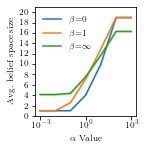

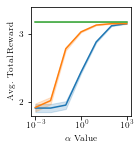

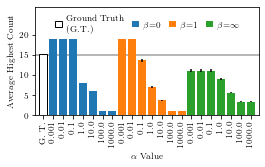

In [2]:
def hparam_alpha_beta(alpha, beta):
    return {
        rp.experiment.ExperimentCycleMDPDatasetMaximizing.HP_BETA: beta,
        rp.experiment.ExperimentCycleMDPDatasetMaximizing.HP_ALPHA: alpha
    }
rp.plot_cycle_mdp_belief_space_size(es_maximizing, hparam_alpha_beta)
fn = osp.join(save_dir, 'alpha_range_maximizing_size.pdf')
plt.savefig(fn, bbox_inches='tight', pad_inches=.05, transparent=True)
rp.plot_alpha_vs_total_reward(es_maximizing, hparam_alpha_beta, legend=False, figsize=(1.8, 2))
fn = osp.join(save_dir, 'alpha_range_maximizing_rew.pdf')
plt.savefig(fn, bbox_inches='tight', pad_inches=.05, transparent=True)
rp.plot_avg_highest_count(es_maximizing, hparam_alpha_beta, figsize=(4, 2))
fn = osp.join(save_dir, 'highest_count_maximizing.pdf')
plt.savefig(fn, bbox_inches='tight', pad_inches=.05, transparent=True)

### Reward-Predictive Model

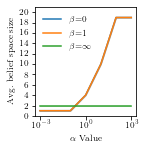

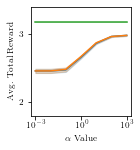

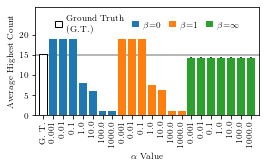

In [3]:
def hparam_alpha_beta(alpha, beta):
    return {
        rp.experiment.ExperimentCycleMDPDatasetPredictive.HP_BETA: beta,
        rp.experiment.ExperimentCycleMDPDatasetPredictive.HP_ALPHA: alpha
    }
rp.plot_cycle_mdp_belief_space_size(es_predictive, hparam_alpha_beta)
fn = osp.join(save_dir, 'alpha_range_predictive_size.pdf')
plt.savefig(fn, bbox_inches='tight', pad_inches=.05, transparent=True)
rp.plot_alpha_vs_total_reward(es_predictive, hparam_alpha_beta, legend=False, figsize=(1.8, 2))
fn = osp.join(save_dir, 'alpha_range_predictive_rew.pdf')
plt.savefig(fn, bbox_inches='tight', pad_inches=.05, transparent=True)
rp.plot_avg_highest_count(es_predictive, hparam_alpha_beta, figsize=(4, 2))
fn = osp.join(save_dir, 'highest_count_predictive.pdf')
plt.savefig(fn, bbox_inches='tight', pad_inches=.05, transparent=True)